# Keras顺序API

```{note}
本节我们使用Fashion-MNIST数据集来演示keras顺序API的使用，包括模型的定义、训练、测试和预测、保存和加载。
```

## Fashion-MNIST数据集

In [1]:
from tensorflow import keras


#@save
def load_fashion_mnist():
    """
    载入Fashion-MNIST数据集
    训练集、验证集、测试集的数量分别为55000、5000、10000
    """
    # 使用keras.datasets载入数据
    (X_train_val, y_train_val), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
    # 分割为训练集和验证集，对输入做归一化
    X_val, X_train = X_train_val[: 5000] / 255.0, X_train_val[5000:] / 255.0
    y_val, y_train = y_train_val[: 5000], y_train_val[5000:]
    # 对测试集的输入做归一化
    X_test = X_test / 255.0
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)


(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_fashion_mnist()
# 查看shape
X_train.shape, y_train.shape

((55000, 28, 28), (55000,))

```{tip}
那些会复用的函数或类的开头会打上#@save标记，它们会保存在utils.py中，这样其他地方若需要使用只需：import utils
```

## 定义模型

In [2]:
# keras的顺序API
model = keras.models.Sequential()
# 添加各层
# Flatten: 用于将输入层的数据压缩成一维数据，需指定input_shape
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# Dense: 全连接层，需指定输出维度
model.add(keras.layers.Dense(300, activation="relu"))
# 两种激活函数的指定方式，效果是一样的
model.add(keras.layers.Dense(100, activation=keras.layers.ReLU()))
model.add(keras.layers.Dense(10, activation="softmax"))

In [3]:
# 直接传各层，效果同上
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [4]:
# 展示模型的各层，None表示未定的batch_size
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## 训练

keras模型在训练前需要先编译（compile），编译会指定损失函数、优化器和训练时要追踪的指标。

若y_true为index，使用sparse_categorical_crossentropy

若y_true为one-hot，使用category_crossentropy

In [5]:
# 编译
model.compile(loss="sparse_categorical_crossentropy",
              # SGD的默认学习率为0.01
              optimizer="sgd",
              metrics=["accuracy"])

In [6]:
# 训练
# history记录了训练时的损失和指标
history = model.fit(X_train, y_train,
                    # 这里未指定batch_size，使用默认值32
                    epochs=10, 
                    validation_data=(X_val, y_val))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7220 - accuracy: 0.7640 - val_loss: 0.5040 - val_accuracy: 0.8304
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4905 - accuracy: 0.8304 - val_loss: 0.4590 - val_accuracy: 0.8444
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4448 - accuracy: 0.8436 - val_loss: 0.4411 - val_accuracy: 0.8466
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4165 - accuracy: 0.8545 - val_loss: 0.4432 - val_accuracy: 0.8476
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3965 - accuracy: 0.8597 - val_loss: 0.3724 - val_accuracy: 0.8746
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3815 - accuracy: 0.8646 - val_loss: 0.3662 - val_accuracy: 0.8752
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3685 - accuracy: 0.8687 - val_loss: 0.3720 - val_accuracy:

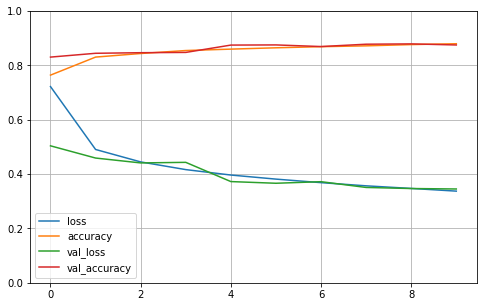

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 使用pandas和matplotlib展示history记录
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## 测试和预测

In [8]:
# 测试
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 652us/step - loss: 0.3850 - accuracy: 0.8608


[0.385049432516098, 0.86080002784729]

In [9]:
# 假设X_new是要进行预测的数据
X_new = X_test[:3]
# 预测得到各类别的概率
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.12, 0.  , 0.84],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [10]:
import numpy as np

# 获取类别，across columns
y_pred = np.argmax(y_proba, axis=-1)
# 对X_new的预测是正确的
y_pred, y_test[: 3]

(array([9, 2, 1]), array([9, 2, 1], dtype=uint8))

## 保存和加载

In [11]:
# 保存模型
model.save("my_fashion_mnist_model")

INFO:tensorflow:Assets written to: my_fashion_mnist_model/assets


In [12]:
# 加载模型
my_model = keras.models.load_model("my_fashion_mnist_model")
# 和之前模型测试的结果一样
my_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 713us/step - loss: 0.3850 - accuracy: 0.8608


[0.385049432516098, 0.86080002784729]